In [ ]:
!git clone https://github.com/minoh0201/DeepMicro.git

In [ ]:
# Some missing keras library from default version
!pip install keras==2.12.0

# Introduction

*   **Background of the problem**
  * **what type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc**
      
      - The paper focuses on both feature engineering and disease prediction tasks. More specifically, the paper addresses the problem of disease prediction using high-dimensional microbiome data by employing deep representation learning techniques for feature engineering, where dimensionality reduction is used to create low-dimensional representations of the microbiome profiles. These learned representations serve as input features for training classifiers to predict disease states.

  * **what is the importance/meaning of solving the problem**
      - The human microbiota plays a crucial role in human health and has been increasingly recognized for its potential to serve as an indicator for various diseases. Effective utilization of this data could enable more accurate and early disease prediction.
      - Due to the high-dimensional nature of microbiome data, it is challenging to use this data effectively. Dimensionality reduction is crucial for making the data more manageable and suitable for analysis.
      - The exploration of deep learning techniques for microbiome data remains limited. Studying this area will greatly benefit future research.

  * **what is the difficulty of the problem**
      - The high-dimensional nature of microbiome data complicates the task of harnessing this data for disease prediction.
      - Small sample sizes, coupled with a large number of features, can lead to the curse of dimensionality, inducing data sparsity in the feature space.
      - The limited exploration of deep learning techniques for microbiome data, despite the rapidly growing metagenomic data, indicates inadequate effort in adapting machine learning algorithms for predicting disease states based on this data.
      - Studies often overlook the importance of validation sets in the evaluation process, leading to an overestimation of the efficacy of predictive models.

  * **the state of the art methods and effectiveness.**
      - The current state-of-the-art methods for predicting disease states based on microbiome data include MetAML, which directly trains classifiers on high-dimensional microbiome profiles, and traditional dimensionality reduction techniques such as PCA and RP. However, MetAML's effectiveness is limited by the high dimensionality of the data, leading to overfitting and reduced performance. PCA and RP aim to preprocess the data by reducing its dimensionality, but their effectiveness in capturing complex patterns and relationships relevant for disease prediction is limited compared to deep learning-based approaches.

*   **Paper explanation**
  * **what did the paper propose**
      - The paper proposes DeepMicro, a deep representation learning framework for predicting individual phenotypes based on microbiome profiles. Various autoencoders (SAE, DAE, VAE, and CAE) are utilized to learn low-dimensional representations of the microbiome profiles. Three classification models (SVM, RF, and MLP) are then trained on the learned representations to discriminate between disease and control sample groups.
  * **what is the innovations of the method**
      - DeepMicro uses autoencoders, a deep learning technique, to learn low-dimensional representations while preserving the intrinsic structure of the microbiome data, addressing the problem of effective dimensionality reduction.
      - Unlike previous research, this paper utilizes both strain-level profiles and abundance information as data sources. Strain-level profiles contain information from hundreds of thousands of gene markers and are more informative for disease prediction than abundance profiles.
      - The paper applies a thorough validation scheme that excludes the test set from hyperparameter optimization, ensuring a fair comparison of models. This addresses the issue of overestimating model performance due to exposing the test set to the model during the training procedure.

  * **how well the proposed method work (in its own metrics)**
      - DeepMicro outperforms the current best approach (MetAML) and traditional methods such as PCA and RP on five out of six datasets, including IBD (AUC = 0.955), EW-T2D (AUC = 0.899), C-T2D (AUC = 0.763), Obesity (AUC = 0.659), and Cirrhosis (AUC = 0.940). For the Colorectal dataset, DeepMicro has a slightly lower performance than MetAML (DeepMicro's AUC = 0.803 vs. MetAML's AUC = 0.811).
      - For abundance profile-based models, DeepMicro outperforms other approaches on four datasets and has slightly lower performance than MetAML on IBD and C-T2D.
      - The method also compares the running time of DeepMicro on marker profiles with a basic approach not using representation learning. The time-saving is significant, with DeepMicro being 8X to 30X faster than the basic approach.

  * **what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).**
      - The paper makes substantial contributions to the research field by surpassing current best methods in disease state prediction for inflammatory bowel disease, type 2 diabetes in Chinese and European women cohorts, liver cirrhosis, and obesity.
      - DeepMicro is open-sourced and publicly available, allowing researchers to obtain robust low-dimensional representations of microbiome profiles with user-defined deep architectures and hyperparameters, benefiting future research in this area.



# Scope of Reproducibility

The hypothesis posits that deep representation learning can make high-dimensional microbiome data a more simplified, low-dimensional format, potentially enhancing the accuracy and speed of disease predictions. Specifically, we aim to test three hypotheses.

**Hypothesis 1:**
 - DeepMicro, functioning as a deep representation learning framework for forecasting individual phenotypes based on microbiome marker profiles, surpasses other approaches such as MetAML and traditional representation learning methods like Principal Component Analysis (PCA) and Gaussian Random Projection (RP) in performance for all six diseases in the dataset except colorectal (refer to Figure 1).

- **Corresponding experiment:** We will execute DeepMicro across six disease datasets on marker profiles to obtain its best area under the receiver operating characteristics curve (AUC) of one of its representation learning model and classifier combination and contrast this result with the AUC of MetAML, PCA, and RP approaches.

**Hypothesis 2:**
- The time taken by DeepMicro to learn a low-dimensional representation of the microbiome marker profiles and then apply these profiles to classification models, including SVM, RF, and MLP, for distinguishing between disease and control sample groups, is shorter than the time required to train classifiers directly on the original microbiome profile. (refer to Figure 2)

- **Corresponding experiment:** We will compare the runtime of DeepMicro on marker profiles with basic approaches that not employing representation learning. For each dataset, we will record the time taken by the best-performing DeepMicro model yielding the highest AUC score. Additionally, we will train classifiers directly on the original microbiome profile and record the time, then compare the time records.

**Hypothesis 3:**
- Different diseases exhibit distinct best-performing deep representation learning models (refer to Figure 3).

- **Corresponding experiment:**For each disease, we will employ four autoencoders to obtain low-dimensional representations of the microbiome  strain-level marker profiles and subsequently apply these profiles to the most suitable corresponding classification models mentioned in the paper. We will utilize AUC as the primary metric for performance comparison, selecting the combination with the best performance as the representation learning model for that disease.








**Figure 1**

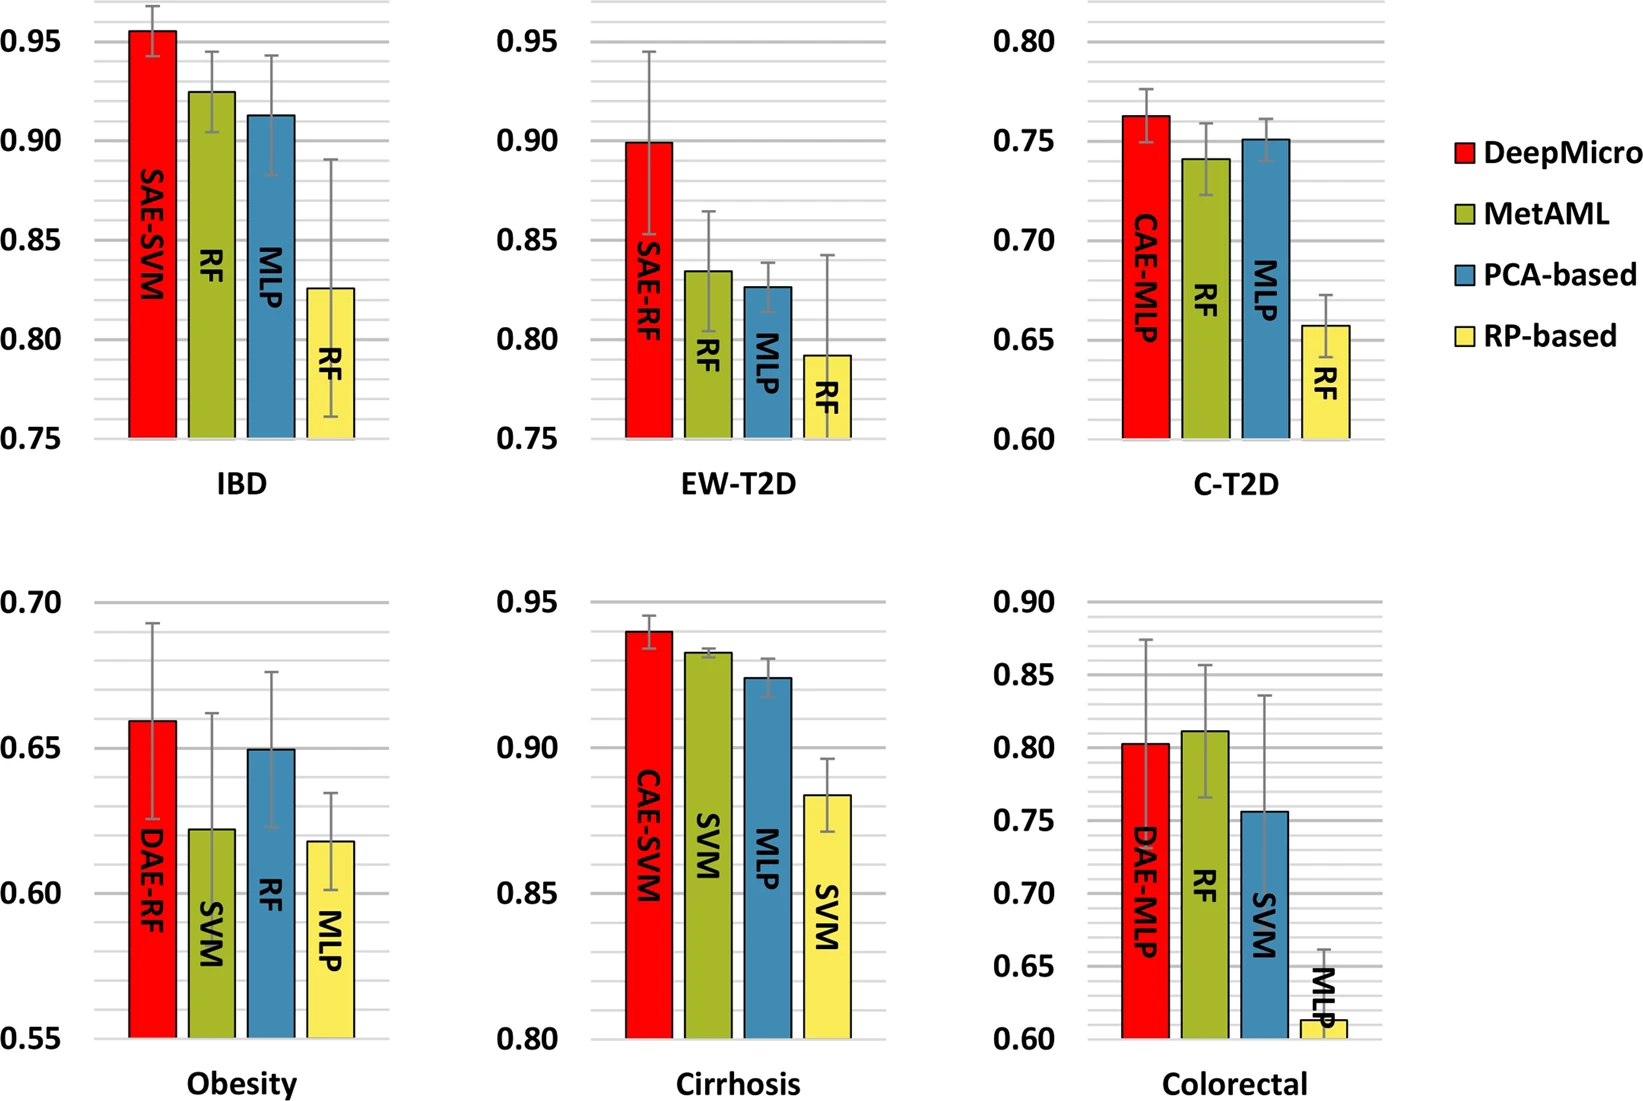

**Figure 2**

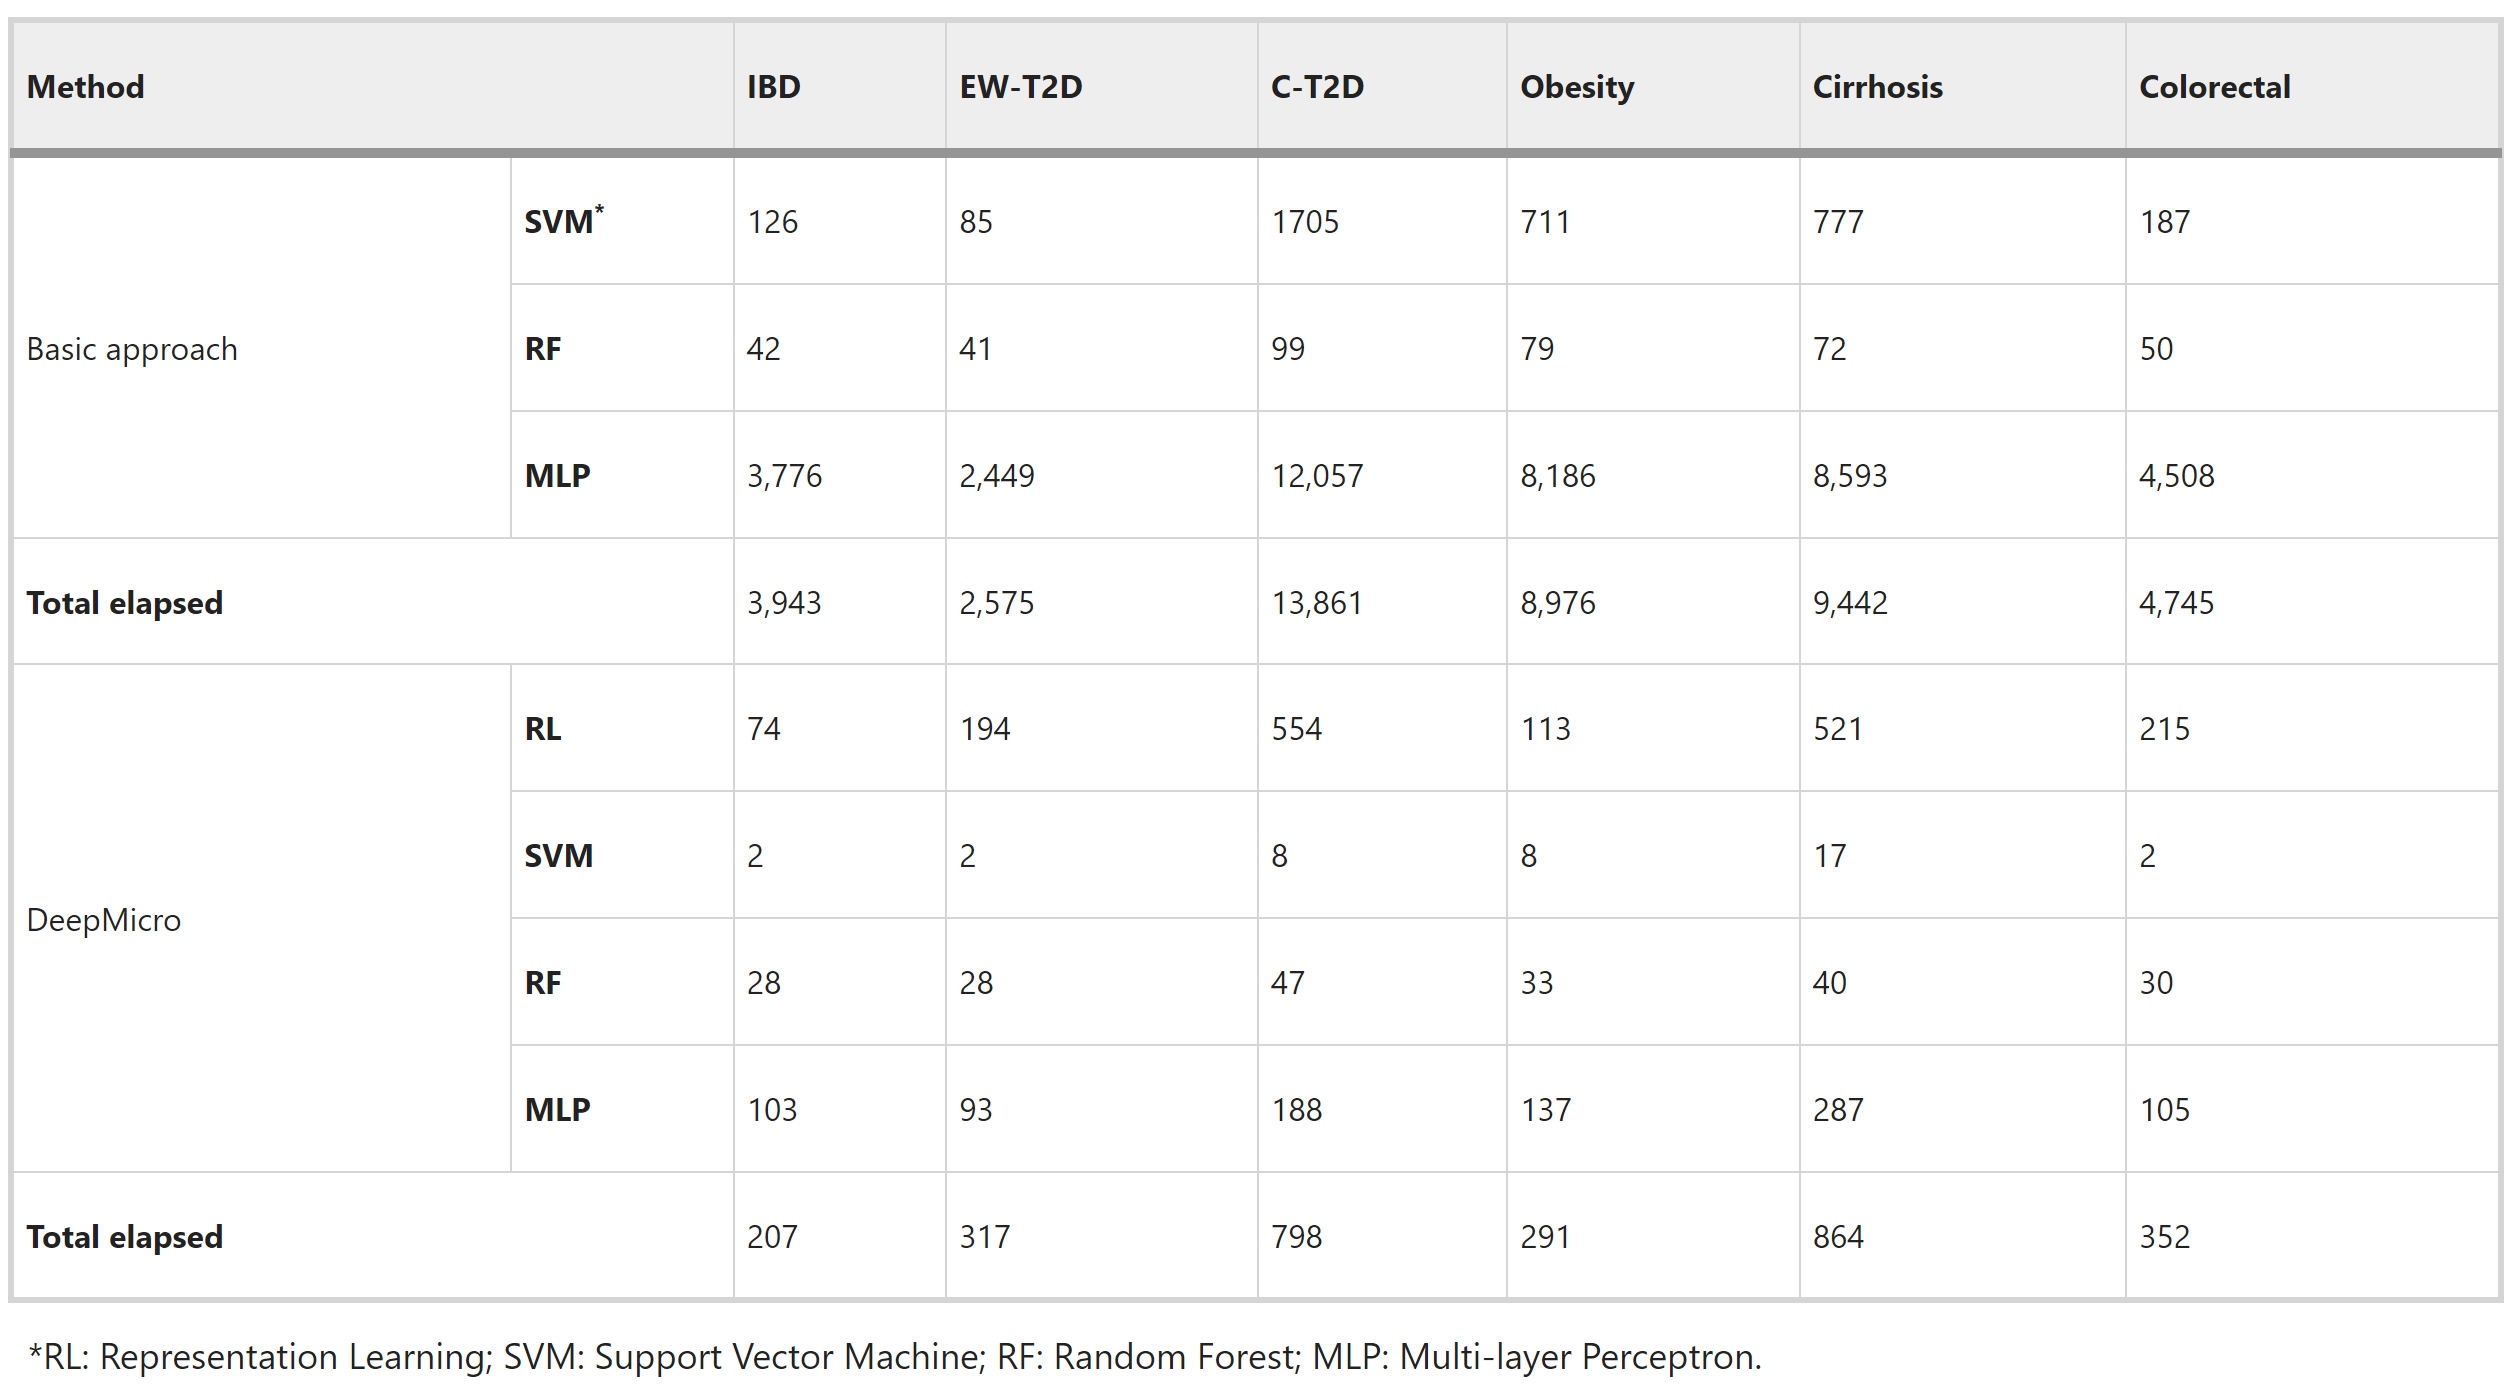

**Figure 3**


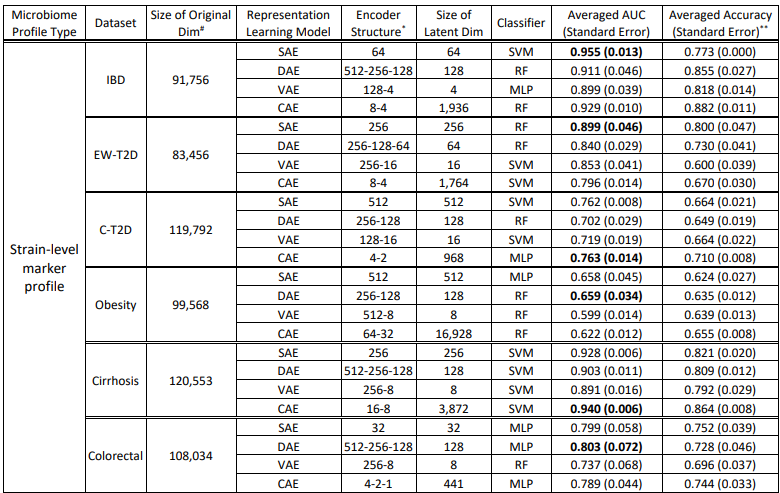

# Set up

To run the project, we first import necessary libraies and set up random seeds.


In [ ]:
# import packages
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Input, Lambda, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Flatten, Reshape, Cropping2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils import check_random_state
import tensorflow as tf

import matplotlib.pyplot as plt
import pickle
import pandas as pd
from collections import namedtuple
import datetime
import math
import numpy as np
import os
import time
import zipfile
import random
from IPython.display import display, HTML

os.environ['PYTHONHASHSEED'] = '7'
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)
check_random_state(7)

In [ ]:
tf.version.VERSION

# Methodology

The methodology section has 4 sections:
1. Data: contains data loading, pre-processing, visualization.
2. Model: defines the methods representing the representation learning and classification models.
3. Training: invokes the defined code from step #1 and #2 to train the models.
4. Evaluation:compares the performance metrics between the models and find the best models.

## Data
Data includes publicly available human gut metagenomic samples of six different diseases: infammatory bowel disease (IBD), type 2 diabetes in European women (EW-T2D), type 2 diabetes in Chinese (C-T2D) cohortobesity, (Obesity), liver cirrhosis (Cirrhosis), and
colorectal cancer (Colorectal):
* IBD cohort has 25 individuals with infammatory bowel disease and 85 healthy controls
* EW-T2D cohort has 53 European women with type 2 diabetes and 43 healthy European women
* C-T2D cohort has 170 Chinese individuals with type 2 diabetes and 174 healthy Chinese controls
* Obesity cohort has 164 obese patients and 89 non-obese controls
* Cirrhosis cohort has 118 patients with liver cirrhosis and 114 healthy controls
* Colorectal cohort has 48 colorectal cancer patients and 73 healthy controls

Two types of microbiome profles were extracted from the metagenomic samples: strain-level marker profle and species-level relative abundance profle. The author has already pre-processed the profile data with MetaPhlAn2 and MetAML. The profile data is provided by separate files (one for each disease) below.

First, we extracts compressed data from 'abundance.zip' and 'marker.zip' into 'abundance_profile' and 'marker_profile' directories respectively.

In [ ]:
# Extract the compressed data
raw_data_dir = './DeepMicro/data'

with zipfile.ZipFile(os.path.join(raw_data_dir, "abundance.zip"),"r") as abd_zip:
    abd_zip.extractall(os.path.join(raw_data_dir,"abundance_profile"))
with zipfile.ZipFile(os.path.join(raw_data_dir, "marker.zip"),"r") as abd_zip:
    abd_zip.extractall(os.path.join(raw_data_dir,"marker_profile"))

Then this part we writes some function to systematically process and analyse the metagenomic data. It first sets up constants and mappings, then defines functions for data processing and analysis, and finally visualizes the results to understand feature sparsity in the data.

More speficially, there are 4 key components of this part:

- Constants and Mappings: This component sets up essential constants such as `LABEL_STR` and `RANDOM_SEED`, and a `LABEL_MAP` that translates descriptive labels of health conditions into numerical codes for analysis. `0` stands for healthy while `1` stands for illness.
- Data Processing Functions: Functions like `process_marker_data` and `process_abundance_data` transform and transpose data for machine learning tasks, while `load_data` loads and preprocesses data files based on disease type and profile.
- Data Visualization: The code adjusts plot settings and uses a visualization function `disease_feature_analysis` to display the features across different disease conditions, highlighting differences between healthy and diseased groups.
- Data Splitting: It's the `split_data` function to partition the dataset into training and testing sets.

In [ ]:

LABEL_STR = "disease"
RANDOM_SEED = 7
LABEL_MAP = {
        # Controls
        'n': 0,
        # Chirrhosis
        'cirrhosis': 1,
        # Colorectal Cancer
        'cancer': 1, 'small_adenoma': 0,
        # IBD
        'ibd_ulcerative_colitis': 1, 'ibd_crohn_disease': 1,
        # T2D and WT2D
        't2d': 1,
        # Obesity
        'leaness': 0, 'obesity': 1,
}

def process_marker_data(df):
    feat_str = 'gi|'
    X = df.loc[df.index.str.contains(feat_str, regex=False)].T
    Y = df.loc[LABEL_STR]
    Y = Y.replace(LABEL_MAP)
    return X.astype('int'), Y.astype('int')

def process_abundance_data(df):
    feat_str = 'k__'
    X = df.loc[df.index.str.contains(feat_str, regex=False)].T
    Y = df.loc[LABEL_STR]
    Y = Y.replace(LABEL_MAP)
    return X.astype('float'), Y.astype('float')

def load_data(disease, profile_type):
    disease_file = profile_type + "_" + disease + ".txt"
    # read file
    filename = os.path.join(raw_data_dir,
                            profile_type + "_profile",
                            disease_file)
    if os.path.isfile(filename):
        raw_data = pd.read_csv(filename, sep='\t', index_col=0, header=None, low_memory=False)
    else:
        print(f"FileNotFoundError: File {filename} does not exist")
        return None

    if profile_type == "abundance":
        return process_abundance_data(raw_data)
    elif profile_type == "marker":
        return process_marker_data(raw_data)
    else:
        print(f"Unrecognized profile type {profile_type}. Accepted profile (abundance|marker)")
    return None, None

Data = namedtuple("Data",["X_train", "X_test", "Y_train", "Y_test"])

# calculate statistics
def calculate_stats(X, Y, disease, profile_type, threshold = 0.1):
  print(f"For disease {'{: <12}'.format(disease)} {profile_type} data X shape {X.shape} and Y shape {Y.shape}")
  def sparsity_plot(X, Y, threshold):
    pass

  return None

# Visualizing the sparsity of the features
plt.rcParams["font.family"] = "serif"
def disease_feature_analysis(disease, X, Y, threshold, ax):

  def sparsity_plot(X, threshold):
    nzero_cnt = (X>threshold).sum(axis=1) / X.shape[1]
    return nzero_cnt.to_numpy()

  neg_counts = sparsity_plot(X[Y == 0], 0.1)
  pos_counts = sparsity_plot(X[Y == 1], 0.1)
  ax.hist(neg_counts, 10, density = True, stacked = True, rwidth = 0.8, alpha = 0.6, label = "healthy", color= "dodgerblue", edgecolor = "blue")
  ax.hist(pos_counts, 10, density = True, stacked = True, rwidth = 0.8, alpha = 0.6, label = disease, color="lightcoral", edgecolor = "red")
  ax.grid(axis='y')
  ax.legend()
  ax.set_xlabel("Nonzero Feature Ratio (Sparsity)")
  ax.set_ylabel("Normalized Sample Density")

def split_data(X, Y):
    # train and test split
    X_train, X_test, Y_train, Y_test = train_test_split(X.values.astype('float16'),
                                                        Y.values.astype('int'),
                                                        test_size=0.2,
                                                        random_state=RANDOM_SEED,
                                                        stratify=Y.values)
    return Data(X_train, X_test, Y_train, Y_test)

Then we load and organize the data from target disease cohorts into two types of profiles: marker and abundance. The process is initializing data structures, bulk data processing, and example data loading for testing purposes.

In [ ]:
marker_data = {}
diseases = ["IBD", "WT2D", "T2D", "Obesity", "Cirrhosis", "Colorectal"]

# Load all data (takes a bit of time)
for disease in diseases:
  marker_data[disease] = load_data(disease, "marker")

# (DraftOnly) Load one example of IBD marker data
ibd_mk_X, ibd_mk_Y = load_data("IBD", "marker")

Then we focus on the statistical analysis and visualization of feature sparsity for different diseases using marker and abundance data profiles. It includes setting up the visualization framework, performing statistical calculations, and managing data for both overall analysis and specific examples.

- Visualization Setup: Configures matplotlib subplots with specific dimensions and labels for displaying feature sparsity across multiple diseases, initializing plotting areas for both marker and abundance data.
- Statistical Analysis and Visualization Loop: Iterates through either marker or abundance data for each disease, calculating statistics and visualizing feature sparsity in an organized subplot grid. This is performed twice, once for each data type (marker and abundance), with configurations adjusted for different visualization details.
- Data Preparation for Modeling: Prepares training and testing datasets from the marker data for all diseases using the split_data function, and specifically processes a subset for IBD as a test case. This step is crucial for subsequent machine learning tasks.

In [ ]:
# Analyze the data (statistics and visualization)
idx = 0
nrow = 2
ncol = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(14, 8))
fig.subplots_adjust(top = 0.8, hspace = 0.4)
fig.suptitle("Disease Marker Feature Sparsity Analysis", fontsize = 20, y = 0.90)

for disease, (X, Y) in marker_data.items():
  calculate_stats(X, Y, disease, "marker")

  # Visualization
  fig_row = math.floor(idx / ncol)
  fig_col = idx % ncol
  disease_feature_analysis(disease, X, Y, 0.1, axs[fig_row, fig_col])
  idx += 1

train_test_marker_data = {}
#for disease, (X, Y) in marker_data.items():
#    train_test_marker_data[disease] = split_data(X, Y)

# (DraftOnly) Split data for train/test for IBD disease
ibd_mk_data = split_data(ibd_mk_X, ibd_mk_Y)
train_test_marker_data['IBD'] = ibd_mk_data

##   Model
The Model section can be split by 3 major sections.
   1. Representation learning models that used in DeepMicro: SAE, DAE, CAE, VAE.
   1. Representation learning models that are commonly used: PCA, RP.
   1. Classification models: Random Forest, SVM, MLP.

### Representation Learning
In order to handle the high dimensionality of the input data, we need to transform the relevant features of the input data into a lower dimensional space that can be fed into a classifier for effective model training. The key of representation learning is to balance the dimension of the encoded space and the information loss from the dimension reduction. To find the best encoder for our dataset, we are going to try a few common autoencoder models including vairous autoencoders, PCA and GRP.

#### Autoencoder
The most straightforward autoencoder is a simple fully connected neural network that maps the input data into a (lower) dimension space. Within this category of autoencoders, we are going to try the shallow autoencoder (SAE) and the deep autoencoder (DAE). The SAE directly connects the input data with the output embedding vector without any hidden layers. The DAE can have one or more hidden layers. Due to their structural similarities, SAE can be treated as a special case of DAE without a hidden layer.

In [ ]:
# Shallow/Deep Autoencoder
def autoencoder(dims,
                act='relu',
                init='glorot_uniform',
                latent_act = False,
                output_act = False):
    """
        Fully connected auto-encoder model, symmetric.
        Arguments:
            dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
                The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
            act: activation, not applied to Input, Hidden and Output layers
        return:
            (ae_model, encoder_model), Model of autoencoder and model of encoder
        """

    # whether put activation function in latent layer
    if latent_act:
        l_act = act
    else:
        l_act = None

    if output_act:
        o_act = 'sigmoid'
    else:
        o_act = None

    # The number of internal layers: layers between input and latent layer
    n_internal_layers = len(dims) - 2

    # input
    x = Input(shape=(dims[0],), name='input')
    h = x

    # internal layers in encoder
    for i in range(n_internal_layers):
        h = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(h)

    # bottle neck layer, features are extracted from here
    h = Dense(dims[-1], activation=l_act, kernel_initializer=init, name='encoder_%d_bottle-neck' % (n_internal_layers))(h)

    y = h

    # internal layers in decoder
    for i in range(n_internal_layers, 0, -1):
        y = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(y)

    # output
    y = Dense(dims[0], activation=o_act, kernel_initializer=init, name='decoder_0')(y)

    return Model(inputs=x, outputs=y, name='AE'), Model(inputs=x, outputs=h, name='encoder')


#### Convolutional Autoencoder
The convolutional autoencoder (CAE) is equipped with convolutional layers. Each convolutional layer consists of multiple kernels that perform convolution operation on a local region of the input data. The local region is been scanned over all the input data by a set of parameters such as padding and stride. Here we adopt a 2D convolutional autoencoder to encode our input data. Since our raw input is represented as sparse 1D vectors of dimension $N$, we first reshape it into a squared 2D muliarray (or image) of size $d$ where $d=⌊\sqrt{N}⌋ + 1$ and pad the extra part with zeros. The number of convolutional layers and the number of filters per layer are both input parameters from $dims$. For the first conv layer, ther kernel size is set to be $rf\_rate$ of the input size and the size of the stride is set to $rt\_rate$ the size of the kernel, both determined by the input parameters. For all other conv layers, the stride size is half of the kernal size for the respective layer. The author has chosen ReLu activation and Glorot uniform initializer for the conv layers.

In [ ]:
def conv_autoencoder(dims, act='relu', init='glorot_uniform', latent_act = False, output_act = False, rf_rate = 0.1, st_rate = 0.25):
    # whether put activation function in latent layer
    if latent_act:
        l_act = act
    else:
        l_act = None

    if output_act:
        o_act = 'sigmoid'
    else:
        o_act = None

    # receptive field and stride size
    rf_size = init_rf_size = int(dims[0][0] * rf_rate)
    stride_size = init_stride_size = int(rf_size * st_rate) if int(rf_size * st_rate) > 0 else 1
    print("receptive field (kernel) size: %d" % rf_size)
    print("stride size: %d" % stride_size)

    # The number of internal layers: layers between input and latent layer
    n_internal_layers = len(dims) - 1

    if n_internal_layers < 1:
        print("The number of internal layers for CAE should be greater than or equal to 1")
        exit()

    # input
    x = Input(shape=dims[0], name='input')
    h = x

    rf_size_list = []
    stride_size_list = []

    # internal layers in encoder
    for i in range(n_internal_layers):
        print("rf_size: %d, st_size: %d" % (rf_size, stride_size))
        h = Conv2D(dims[i + 1], (rf_size,rf_size), strides=(stride_size, stride_size), activation=act, padding='same', kernel_initializer=init, name='encoder_conv_%d' % i)(h)
        rf_size = int(K.int_shape(h)[1] * rf_rate)
        stride_size = int(rf_size /2.) if int(rf_size /2.) > 0 else 1
        rf_size_list.append(rf_size)
        stride_size_list.append(stride_size)

    reshapeDim = K.int_shape(h)[1:]

    # bottle neck layer, features are extracted from h
    h = Flatten()(h)

    y = h

    y = Reshape(reshapeDim)(y)

    print(rf_size_list)
    print(stride_size_list)

    # internal layers in decoder
    for i in range(n_internal_layers - 1, 0, -1):
        y = Conv2DTranspose(dims[i], (rf_size_list[i-1],rf_size_list[i-1]), strides=(stride_size_list[i-1], stride_size_list[i-1]), activation=act, padding='same', kernel_initializer=init, name='decoder_conv_%d' % i)(y)

    y = Conv2DTranspose(1, (init_rf_size, init_rf_size), strides=(init_stride_size, init_stride_size), activation=o_act, kernel_initializer=init, padding='same', name='decoder_1')(y)

    # output cropping
    if K.int_shape(x)[1] != K.int_shape(y)[1]:
        cropping_size = K.int_shape(y)[1] - K.int_shape(x)[1]
        y = Cropping2D(cropping=((cropping_size, 0), (cropping_size, 0)), data_format=None)(y)

    return Model(inputs=x, outputs=y, name='CAE'), Model(inputs=x, outputs=h, name='encoder')



#### Variational Autoencoder

There are two functions involved in the variational autoencoder model:

<br />

#### `variational_AE` function:

This function defines the architecture of the variational autoencoder, including the encoder and decoder.
1. The function takes several parameters, such as the dimensions of each layer, the activation function, the initialization method, the output activation function, the reconstruction loss function, and the weight beta for the KL divergence loss.
2. The function first builds the encoder model, including the input layer, internal layers, and latent variable layer. The latent variable layer uses the sampling function for reparameterization.
3. Then, the function builds the decoder model, including the latent variable input layer, internal layers, and output layer.
4. Next, the function combines the encoder and decoder to form the complete VAE model.
5. The function defines the loss function for the VAE, which includes the reconstruction loss and the KL divergence loss, and adds the loss function to the VAE model.
6. Finally, the function compiles the VAE model and returns the VAE model, encoder, and decoder.

<br />


#### sampling function (used within `variational_AE`):

This function implements the reparameterization trick, which is used to sample from the posterior distribution Q(z|X) of the latent variables.
1. The function takes two parameters: the mean z_mean and the standard deviation z_sigma of the latent variables.
2. The function first retrieves the batch size and the dimension of the latent variables.
3. Then, the function samples a random vector epsilon from the standard normal distribution N(0,I).
4. Finally, the function returns z_mean + z_sigma * epsilon, representing the sampled latent variables.

<br />



In [ ]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_sigma = args
    #z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + z_sigma * epsilon
    #return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Variational Autoencoder
def variational_AE(dims, act='relu', init='glorot_uniform', output_act = False, recon_loss = 'mse', beta=1):

    if output_act:
        o_act = 'sigmoid'
    else:
        o_act = None

    # The number of internal layers: layers between input and latent layer
    n_internal_layers = len(dims) - 2

    ## build encoder model
    inputs = Input(shape=(dims[0],), name='input')

    h = inputs

    # internal layers in encoder
    for i in range(n_internal_layers):
        h = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(h)

    # latent layer
    z_mean = Dense(dims[-1], name='z_mean')(h)
    z_sigma = Dense(dims[-1], name='z_sigma')(h)

    # z_log_var = Dense(dims[-1], name='z_log_var')(h)

    # use reparameterization trick to push the sampling out as input
    # note that "output_shape" isn't necessary with the TensorFlow backend
    z = Lambda(sampling, output_shape=(dims[-1],), name='z')([z_mean, z_sigma])

    # instantiate encoder model
    encoder = Model(inputs, [z_mean, z_sigma, z], name='encoder')

    ## build decoder model
    latent_inputs = Input(shape=(dims[-1],), name='z_sampling')

    y = latent_inputs

    # internal layers in decoder
    for i in range(n_internal_layers, 0, -1):
        y = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(y)

    outputs = Dense(dims[0], kernel_initializer=init, activation=o_act)(y)

    # instantiate decoder model
    decoder = Model(latent_inputs, outputs, name='decoder')

    # instantiate VAE model
    outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, outputs, name='vae_mlp')


    ## loss function
    if recon_loss == 'mse':
        reconstruction_loss = mse(inputs, outputs)
    else:
        reconstruction_loss = binary_crossentropy(inputs,
                                                  outputs)

    reconstruction_loss *= dims[0]

    kl_loss = 1 + K.log(1e-8 + K.square(z_sigma)) - K.square(z_mean) - K.square(z_sigma)
    #kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5

    vae_loss = K.mean(reconstruction_loss + (beta * kl_loss))
    vae.add_loss(vae_loss)

    vae.compile(optimizer='adam', )

    vae.metrics_tensors = []
    vae.metrics_tensors.append(K.mean(reconstruction_loss))
    vae.metrics_names.append("recon_loss")
    vae.metrics_tensors.append(K.mean(beta * kl_loss))
    vae.metrics_names.append("kl_loss")

    return vae, encoder, decoder

### Other Dimensionality Reduction methods

In addition to the DeepMicro model which mainly use various autoencoder, the paper also tested different models to compare the performance. More specifically, it compare the MetAML that directly trained classifiers (SVM and RF), and two traditional dimensionality reduction algorithms, which are Principal Component Analysis (PCA) and Gaussian Random Projection (RP), and compare their performance after applying same set of classifiers as DeepMircro(SVM, RF, MLP).

Since MetAML doesn’t use any representation learning model, there are two more representation learning model models are ultilized in this project, which are PCA and RP.

#### Principal Component Analysis (PCA)

This method performs PCA on the training and testing sets (`X_train` and `X_test`) to reduce their dimensionality while retaining a specified ratio of the explained variance.

1. Initialize a PCA object and then fits it to the `X_train` to determine the explained variance ratios for each component.
2. Iteratively selects the minimum number of components until the total explained variance reaches 99% or more.
3. Repeat #1 with the number of components calculated on #2.
4. return the PCA transformed `X_train_pca` and `X_test_pca`


In [ ]:
#Principal Component Analysis model and training
def pca(X_train, X_test, ratio=0.99):
        # PCA
        pca = PCA()
        pca.fit(X_train)
        n_comp = 0
        ratio_sum = 0.0

        for comp in pca.explained_variance_ratio_:
            ratio_sum += comp
            n_comp += 1
            if ratio_sum >= ratio:  # Selecting components explaining 99% of variance
                break

        pca = PCA(n_components=n_comp)
        pca.fit(X_train)

        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        return X_train_pca, X_test_pca

1. Build low dimention representation fo each marker using the defined PCA method.
2. Replace the training & test sets with the PCA transformed data.

In [ ]:
# Build low dimension representation of each marker data
pca_embeddings = {}
for disease, orig_data_split in train_test_marker_data.items():
  X_train_pca, X_test_pca = pca(orig_data_split.X_train, orig_data_split.X_test)
  pca_embeddings[disease] = orig_data_split._replace(X_train = X_train_pca, X_test = X_test_pca)
  print(f"For disease {'{: <12}'.format(disease)} the original train/test data dimension {orig_data_split.X_train.shape[1]}/{orig_data_split.X_test.shape[1]} reduced to {X_train_pca.shape[1]}/{X_test_pca.shape[1]}")

#### Gaussian Random Projection (RP)

This method performs RP on the training and testing sets (`X_train` and `X_test`) to reduce their dimensionality while preserving pairwise distances between data points.

1. Initialize a `GaussianRandomProjection` object with `eps=0.5`, which controls the quality of the embedding.
2. Fit the `GaussianRandomProjection` object to the `X_train` to determine the random projection matrix.
3. Return the GRP transformed `X_train_rp` and `X_test_rp`.

In [ ]:
# Gausian Random Projection model and training
def rp(X_train, X_test):
        # RP
        rp = GaussianRandomProjection(eps=0.5)
        rp.fit(X_train)

        # applying RP to the whole training and the test set.
        X_train_rp = rp.transform(X_train)
        X_test_rp = rp.transform(X_test)
        return X_train_rp, X_test_rp

1. Build low dimention representation fo each marker profile using the defined RP method.
2. Replace the training & test sets with the RP transformed data.

In [ ]:
# Build low dimension representation of each marker data
rp_embeddings = {}
for disease, orig_data_split in train_test_marker_data.items():
  X_train_rp, X_test_rp = rp(orig_data_split.X_train, orig_data_split.X_test)
  rp_embeddings[disease] = orig_data_split._replace(X_train = X_train_rp, X_test = X_test_rp)
  print(f"For disease {'{: <12}'.format(disease)} the original train/test data dimension {orig_data_split.X_train.shape[1]}/{orig_data_split.X_test.shape[1]} reduced to {X_train_rp.shape[1]}/{X_test_rp.shape[1]}")

### Classification Models
Once a representation model (encoder) is trained, we freeze the encoder and train various classification models for the disease prediction tasks. In the original paper, it use 3 classfiers:  Random Forest(RF), Support Vector Machine(SVM) and Multi-layer Perceptron(MLP). Since the RF and SVM are built in model in sklearn package, we will use these two from the package and write the MLP model in this session.

#### Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We use the RandomForestClassifier from sklearn package.

#### Support Vector Machine
A support vector machine is a algorithm that uses supervised learning models that performs optimal data transformations in order to determine boundaries between data points based on predefined classes. We use the SVC model from sklearn package.

#### Multi-layer Perceptron (MLP)

The method `mlp_model` builds and compiles an MLP model with a configurable number of hidden layers, units per layer, and dropout rate.

1. It creates a Sequential model using `Sequential()`.
2. If `numHiddenLayers` is greater than or equal to 1, the function adds the hidden layers to the model:
   - The first hidden layer must be a Dense layer with `numUnits` units, `input_dim` as the input dimensionality, and `relu` activation.
   - Secondly, a Dropout layer with the specified `dropout_rate` is created.
   - For the remaining hidden layers, create Dense layer with half units of their previous layers accordingly.
3. If `numHiddenLayers` is 0, do not add any hidden layers.
4. Add the output layer, which is a Dense layer with 1 unit, `input_dim` as the input dimensionality, and 'sigmoid' activation.
5. Compiles the model:
   - The loss function is set to `binary_crossentropy` for binary classification.
   - The optimizer is set to `adam` (Adam optimizer).
6. Return the compiled MLP model.

In [ ]:
def mlp_model(input_dim, numHiddenLayers=3, numUnits=64, dropout_rate=0.5):

    model = Sequential()

    #Check number of hidden layers
    if numHiddenLayers >= 1:
        # First Hidden layer
        model.add(Dense(numUnits, input_dim=input_dim, activation='relu'))
        model.add(Dropout(dropout_rate))

        # Second to the last hidden layers
        for i in range(numHiddenLayers - 1):
            numUnits = numUnits // 2
            model.add(Dense(numUnits, activation='relu'))
            model.add(Dropout(dropout_rate))

        # output layer
        model.add(Dense(1, activation='sigmoid'))

    else:
        # output layer
        model.add(Dense(1, input_dim=input_dim, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', )#metrics=['accuracy'])

    return model

##   Training

The training section is split into two categories:
1. Representation learning model training: including SAE, DAE, CAE and VAE.
2. Classifier models training: including SVM, RF and MLP.

### Representation Learning Training

This section includes the training details of the representation learning models.

We first define the base class for encoder models.

- The `DeepMicroBase` class serves as a base class for encoder models. It initializes common attributes such as training and testing data, disease name, start time, random seed, and a prefix.
- The `updateData` method allows updating the data attributes with the transformed ones.
- The `saveLossProgress` collects loss values from the model's training history and returns the loss collector and the maximum loss value at the end of training.


In [ ]:
# Define a common base class for all encoder models to build upon
class DeepMicroBase(object):
    def __init__(self, disease, data):
        self.X_train = data.X_train
        self.Y_train = data.Y_train
        self.X_test = data.X_test
        self.Y_test = data.Y_test
        self.disease = disease
        self.t_start = time.time()
        self.seed = RANDOM_SEED
        self.prefix = ''
        self.representation_only = False

    def updateData(self, data):
        self.X_train = data.X_train
        self.Y_train = data.Y_train
        self.X_test = data.X_test
        self.Y_test = data.Y_test

    def saveLossProgress(self):
        # supporting loss plot
        loss_collector = []
        loss_max_atTheEnd = 0.0
        for hist in self.history.history:
            current = self.history.history[hist]
            loss_collector += current
            if current[-1] >= loss_max_atTheEnd:
                loss_max_atTheEnd = current[-1]
        return loss_collector, loss_max_atTheEnd

In [ ]:
# Get the best representation of each dataset
best_embeddings = {}

#### Autoencoder Training

The `AutoEncoder` class is derived from the `DeepMicroBase` class and represents a shallow (SAE) or deep autoencoder (DAE) model.
 - The `train` method trains the autoencoder with specified parameters such as dimensions, epochs, batch size, loss function, activation functions, patience for early stopping, and validation split. It also handles checkpoint loading and saving.
 - The `predict` method uses the trained encoder to generate predictions on input data.

In [ ]:
# Shallow/Deep Autoencoder
class AutoEncoder(DeepMicroBase):
    def __init__(self, data, disease):
        super().__init__(data, disease)
    def train(self,
           dims = [50],
       epochs= 2000,
       batch_size=100,
       verbose=2,
       loss='mse',
       latent_act=False,
       output_act=False,
       act='relu',
       patience=20,
       val_rate=0.2,
       load_checkpoint=None,
       no_train = False):

        # manipulating an experiment identifier in the output file
        if patience != 20:
            self.prefix += 'p' + str(patience) + '_'
        if len(dims) == 1:
            self.prefix += 'AE'
        else:
            self.prefix += 'DAE'
        if loss == 'binary_crossentropy':
            self.prefix += 'b'
        if latent_act:
            self.prefix += 't'
        if output_act:
            self.prefix += 'T'
        self.prefix += str(dims).replace(", ", "-") + '_'
        if act == 'sigmoid':
            self.prefix = self.prefix + 's'

        # filename for temporary model checkpoint
        modelName = self.prefix + self.disease + '.h5'


        # callbacks for each epoch
        callbacks = [EarlyStopping(monitor='val_loss', patience=patience, mode='min', verbose=1),
                     ModelCheckpoint(modelName, monitor='val_loss', mode='min', verbose=1, save_best_only=True)]

        # spliting the training set into the inner-train and the inner-test set (validation set)
        X_inner_train, X_inner_test, y_inner_train, y_inner_test = train_test_split(
            self.X_train,
            self.Y_train,
            test_size=val_rate,
            random_state=self.seed,
            stratify=self.Y_train)

        # insert input shape into dimension list
        dims.insert(0, X_inner_train.shape[1])

        if load_checkpoint and os.path.isfile(load_checkpoint):
            self.autoencoder = load_model(load_checkpoint)
            print(f"Model loaded from checkpoint file {load_checkpoint}")
        else:
            print(f"Checkpoint file {load_checkpoint} non-existent, start training from scratch...")
            if os.path.isfile(modelName):
                # clean up model checkpoint before use
                os.remove(modelName)
            # create autoencoder model
            self.autoencoder, self.encoder = autoencoder(dims,
                                                     act=act,
                                                     latent_act=latent_act,
                                                     output_act=output_act)
        self.autoencoder.summary()

        if not no_train:
            # compile model
            self.autoencoder.compile(optimizer='adam', loss=loss)

            # fit model
            self.history = self.autoencoder.fit(X_inner_train, X_inner_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks,
                             verbose=verbose, validation_data=(X_inner_test, X_inner_test))
            # save loss progress
            self.saveLossProgress()

            # load best model
            self.autoencoder = load_model(modelName)
        layer_idx = int((len(self.autoencoder.layers) - 1) / 2)
        self.encoder = Model(self.autoencoder.layers[0].input,
                             self.autoencoder.layers[layer_idx].output)
    def predict(self, X):
        return self.encoder.predict(X)

Then we can train the autoencode model. Please noted that this model can both applied on shallow autoencoder training and deep autoencoder training. The only difference between this two is the "dims" dimensions. To train the model, we need to modify some content in the following code. For example, if we are going to train a SAE model for IBD disease. We will do the following steps:

1. create an autoencoder.

2. train it using the below parameters:
- The autoencoder will have a single layer with 64 units.
- The training will run for a maximum of 2000 epochs.
- The loss function used is mean squared error.
- Early stopping is used with a patience of 20 epochs.
- The training will load a previously saved checkpoint if available.

3. `predit` both training and test set to return `X_embed_train` and `X_embed_test`.

4. create a new dataset `ibd_mk_ae_embedding` by replacing the original training and testing data in `ibd_mk_data` with the corresponding autoencoder embeddings using the `_replace` method.

The code block loads the checkpoint directly to skip the training.

In [ ]:
# Train autoencoder for IBD
ae = AutoEncoder("IBD", ibd_mk_data)
ae.train(dims=[64],
         epochs=2000,
         loss='mse',
         patience=20,
         load_checkpoint="AE[64]_IBD.h5",
         no_train = True)

X_embed_train = ae.predict(ibd_mk_data.X_train)
X_embed_test = ae.predict(ibd_mk_data.X_test)
ibd_mk_ae_embedding = ibd_mk_data._replace(X_train = X_embed_train, X_test = X_embed_test)
# Get the best representation of each dataset
best_embeddings['IBD'] = ibd_mk_ae_embedding

#### Convolutional Autoencoder Training

The `ConvAutoEncoder` class is derived from the `DeepMicroBase` class and represents a convolutional autoencoder (CAE) model.
- The `train` method trains the CAE with specified parameters such as dimensions, epochs, batch size, loss function, activation functions, patience for early stopping, validation split, receptive field rate, and stride rate. It also handles checkpoint loading and saving.
- The `transformX` method is used to preprocess the input data before training and prediction. It pads the input data with zeros to make it a square matrix and then reshapes it into a 4D tensor suitable for convolutional layers.
- The `predict` method first preprocesses the input data using `transformX` and then uses the trained encoder to generate predictions on the transformed data.

In [ ]:
class ConvAutoEncoder(DeepMicroBase):
    def __init__(self, disease, data):
        super().__init__(disease, data)

    def train(self,
            dims = [32],
            epochs=2000,
            batch_size=100,
            verbose=2,
            loss='mse',
            output_act=False,
            act='relu',
            patience=25,
            val_rate=0.2,
            rf_rate = 0.1,
            st_rate = 0.25,
            load_checkpoint=None,
            no_train = False):

        # manipulating an experiment identifier in the output file
        self.prefix += 'CAE'
        if loss == 'binary_crossentropy':
            self.prefix += 'b'
        if output_act:
            self.prefix += 'T'
        self.prefix += str(dims).replace(", ", "-") + '_'
        if act == 'sigmoid':
            self.prefix += 'sig_'

        # filename for temporary model checkpoint
        modelName = self.prefix + self.disease + '.h5'

        # callbacks for each epoch
        callbacks = [EarlyStopping(monitor='val_loss', patience=patience, mode='min', verbose=1),
                     ModelCheckpoint(modelName, monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=False)]

        X = self.transformX(self.X_train)

        # spliting the training set into the inner-train and the inner-test set (validation set)
        X_inner_train, X_inner_test, y_inner_train, y_inner_test = train_test_split(X, self.Y_train,
                                                                                    test_size=val_rate,
                                                                                    random_state=self.seed,
                                                                                    stratify=self.Y_train)
        onesideDim = int(math.sqrt(self.X_train.shape[1])) + 1
        # insert input shape into dimension list
        dims.insert(0, (onesideDim, onesideDim, 1))

        if load_checkpoint and os.path.isfile(load_checkpoint):
            self.cae = load_model(load_checkpoint)
            print(f"Model loaded from checkpoint file {load_checkpoint}")
        else:
            print(f"Checkpoint file {load_checkpoint} non-existent, start training from scratch...")
            if os.path.isfile(modelName):
                # clean up model checkpoint before use
                os.remove(modelName)
            # create conv audoencoder model
            self.cae, self.encoder = conv_autoencoder(dims,
                                                      act=act,
                                                      output_act=output_act,
                                                      rf_rate = rf_rate,
                                                      st_rate = st_rate)


        self.cae.summary()

        if not no_train:
            # compile
            self.cae.compile(optimizer='adam', loss=loss)

            # fit
            self.history = self.cae.fit(X_inner_train,
                                    X_inner_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    callbacks=callbacks,
                                    verbose=verbose,
                                    validation_data=(X_inner_test, X_inner_test, None))

            # save loss progress
            self.saveLossProgress()

            # load best model
            self.cae.load_weights(modelName)
        if len(self.cae.layers) % 2 == 0:
            layer_idx = int((len(self.cae.layers) - 2) / 2)
        else:
            layer_idx = int((len(self.cae.layers) - 1) / 2)
        self.encoder = Model(self.cae.layers[0].input, self.cae.layers[layer_idx].output)

    def transformX(self, X_in):
        # fill out blank
        onesideDim = int(math.sqrt(X_in.shape[1])) + 1
        enlargedDim = onesideDim ** 2
        X = np.column_stack((X_in, np.zeros((X_in.shape[0], enlargedDim - X_in.shape[1]))))

        # reshape
        X = np.reshape(X, (len(X), onesideDim, onesideDim, 1))
        return X

    def predict(self, X):
        return self.encoder.predict(self.transformX(X))

Similar to the training of autoencoder, here's the example steps for training CAE for IBD disearse.

1. Create a CAE.

2. train it using the below parameters:
   - The CAE will have two convolutional layers with 8 and 4 filters, respectively.
   - The training will run for a maximum of 10 epochs.
   - The loss function used is mean squared error.
   - Early stopping is used with a patience of 5 epochs.
   - The training will load a previously saved checkpoint if available.

3. `predit` both training and test set to return `X_embed_train` and `X_embed_test`.

4. create a new dataset `ibd_mk_ae_embedding` by replacing the original training and testing data in `ibd_mk_data` with the corresponding autoencoder embeddings using the `_replace` method.

The code block loads the checkpoint directly to skip the training.

In [ ]:
# Train convolutional autoencoder for IBD
cae = ConvAutoEncoder("IBD", ibd_mk_data)
cae.train(dims=[8, 4],
         epochs=10,
         loss='mse',
         patience=5,
         load_checkpoint=None,
         no_train = True)

X_embed_train = cae.predict(ibd_mk_data.X_train)
X_embed_test = cae.predict(ibd_mk_data.X_test)
ibd_mk_cae_embedding = ibd_mk_data._replace(X_train = X_embed_train, X_test = X_embed_test)

#### Variational Autoencode Training

The vae function execute the the training process of a variational autoencoder. Here's the detail.

1. The vae function initiates the training of the variational autoencoder with specific parameters such as the dimensions of the encoder, the number of training epochs, and the batch size. It handles the overall execution and monitoring of the training process.

2. It uses callbacks to manage the training lifecycle, including early stopping if no improvement is seen in the validation loss and model checkpointing to save the best performing weights.

3. If enabled, a warm-up phase gradually increases the KL divergence loss contribution during the first few epochs through a custom lambda callback.

4. The dataset is divided into an inner training set and a validation set. The DNN_models.variational_AE function is called to create the VAE model, which is then fitted using the inner training set. Progress and performance during training are monitored and recorded after each epoch.

5. Post training, the vae function loads the best model weights and uses the trained encoder to compress the data into a lower-dimensional representation for both the training set and the test set.

In [ ]:
# Variational Autoencoder
class VarAutoEncoder(DeepMicroBase):
    def __init__(self, disease, data):
        super().__init__(disease, data)
    def train(self,
              dims = [10],
              epochs=2000,
              batch_size=100,
              verbose=2,
              loss='mse',
              output_act=False,
              act='relu',
              patience=25,
              beta=1.0,
              warmup=True,
              warmup_rate=0.01,
              val_rate=0.2,
              load_checkpoint=None,
              no_train = False):

      # manipulating an experiment identifier in the output file
      if patience != 25:
          self.prefix += 'p' + str(patience) + '_'
      if warmup:
          self.prefix += 'w' + str(warmup_rate) + '_'
      self.prefix += 'VAE'
      if loss == 'binary_crossentropy':
          self.prefix += 'b'
      if output_act:
          self.prefix += 'T'
      if beta != 1:
          self.prefix += 'B' + str(beta)
      self.prefix += str(dims).replace(", ", "-") + '_'
      if act == 'sigmoid':
          self.prefix += 'sig_'

      # filename for temporary model checkpoint
      modelName = self.prefix + self.disease + '.h5'

      # callbacks for each epoch
      callbacks = [EarlyStopping(monitor='val_loss', patience=patience, mode='min', verbose=1),
                    ModelCheckpoint(modelName, monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)]

      # warm-up callback
      warm_up_cb = LambdaCallback(on_epoch_end=lambda epoch, logs: [warm_up(epoch)])  # , print(epoch), print(K.get_value(beta))])

      # warm-up implementation
      def warm_up(epoch):
          val = epoch * warmup_rate
          if val <= 1.0:
              K.set_value(beta, val)
      # add warm-up callback if requested
      if warmup:
          beta = K.variable(value=0.0)
          callbacks.append(warm_up_cb)

      # spliting the training set into the inner-train and the inner-test set (validation set)
      X_inner_train, X_inner_test, y_inner_train, y_inner_test = train_test_split(self.X_train, self.Y_train,
                                                                                  test_size=val_rate,
                                                                                  random_state=self.seed,
                                                                                  stratify=self.Y_train)

      # insert input shape into dimension list
      dims.insert(0, X_inner_train.shape[1])

      # create vae model
      self.vae, self.encoder, self.decoder = variational_AE(dims,
                                                            act=act,
                                                            recon_loss=loss,
                                                            output_act=output_act,
                                                            beta=beta)

      if load_checkpoint and os.path.isfile(load_checkpoint):
            self.vae.load_weights(load_checkpoint)
            print(f"Model loaded from checkpoint file {load_checkpoint}")
      else:
            print(f"Checkpoint file {load_checkpoint} non-existent, start training from scratch...")
            if os.path.isfile(modelName):
                # clean up model checkpoint before use
                os.remove(modelName)


      self.vae.summary()

      if not no_train:
          # fit
          self.history = self.vae.fit(X_inner_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  callbacks=callbacks,
                                  verbose=verbose,
                                  validation_data=(X_inner_test, None))

          # save loss progress
          self.saveLossProgress()

          # load best model
          self.vae.load_weights(modelName)
      self.encoder = self.vae.layers[1]

    def predict(self, X):
        _, _, Y = vae.encoder.predict(X)
        return Y

Similar to the training of autoencoder and convolutional autoencoder, here's the example steps for training VAE for IBD disearse.

1. Create a Variational Autoencoder (VAE).

2. Train it using the below parameters:
- The VAE will have two hidden layers with 128 and 4 units, respectively.
- The training will run for a maximum of 20 epochs.
- The loss function used is mean squared error.
- Early stopping is used with a patience of 5 epochs.
- The training will load a previously saved checkpoint if available.

3. `predict` both training and test set to return `X_embed_train` and `X_embed_test`.

4. create a new dataset `ibd_mk_vae_embedding` by replacing the original training and testing data in `ibd_mk_data` with the corresponding variational autoencoder embeddings using the `_replace` method.


The code block loads the checkpoint directly to skip the training.

In [ ]:
# Train variational autoencoder
vae = VarAutoEncoder("IBD", ibd_mk_data)
vae.train(dims=[128, 4],
         epochs=20,
         loss='mse',
         patience=5,
         load_checkpoint=None,
         no_train = True)

X_embed_train = vae.predict(ibd_mk_data.X_train)
X_embed_test = vae.predict(ibd_mk_data.X_test)
ibd_mk_vae_embedding = ibd_mk_data._replace(X_train = X_embed_train, X_test = X_embed_test)

### Classification Training

The provided code defines a `Classifier` class that inherits from the `DeepMicroBase` class. The purpose of this class is to train and evaluate classifiers using different machine learning methods such as Support Vector Machines (SVM), Random Forests (RF), and Multi-layer Perceptrons (MLP). The class uses grid search with cross-validation to tune the hyperparameters of the chosen classifier.

In [ ]:
# hyper-parameter grids for classifiers
rf_hyper_parameters = [{'n_estimators': [s for s in range(100, 1001, 200)],
                            'max_features': ['sqrt', 'log2'],
                            'min_samples_leaf': [1, 2, 3, 4, 5],
                            'criterion': ['gini', 'entropy']
                            }, ]
svm_hyper_parameters = [{'C': [2 ** s for s in range(-5, 6, 2)], 'kernel': ['linear']},
                            {'C': [2 ** s for s in range(-5, 6, 2)], 'gamma': [2 ** s for s in range(3, -15, -2)],'kernel': ['rbf']}]

mlp_hyper_parameters = [{'numHiddenLayers': [1, 2, 3],
                             'epochs': [30, 50, 100, 200, 300],
                             'numUnits': [10, 30, 50, 100],
                             'dropout_rate': [0.1, 0.3],
                             },]

def save_model(model, filename):
    with open(filename, 'wb') as f:
      pickle.dump(model, f)

def load_model(checkpoint):
    with open(checkpoint, 'rb') as f:
      return pickle.load(f)

class Classifier(DeepMicroBase):
    def __init__(self, disease, data):
        super().__init__(disease, data)
    def train(self, hyper_parameters, method='svm', cv=5, scoring='roc_auc', n_jobs=1, cache_size=1000, verbose = 0, load_checkpoint = None, save_model_prefix = ""):
        clf_start_time = time.time()
        if verbose > 0:
          print("# Tuning hyper-parameters")
          print(self.X_train.shape, self.Y_train.shape)

        if load_checkpoint and os.path.isfile(load_checkpoint):
            self.clf = load_model(load_checkpoint)
        else:
            # Support Vector Machine
            if method == 'svm':
                self.clf = GridSearchCV(SVC(probability=True, cache_size=cache_size),
                                        hyper_parameters,
                                        cv=StratifiedKFold(cv, shuffle=True),
                                        scoring=scoring,
                                        n_jobs=n_jobs,
                                        verbose=verbose, )
                self.clf.fit(self.X_train, self.Y_train)

            # Random Forest
            if method == 'rf':
                self.clf = GridSearchCV(RandomForestClassifier(n_jobs=n_jobs, random_state=0),
                                        hyper_parameters,
                                        cv=StratifiedKFold(cv, shuffle=True),
                                        scoring=scoring,
                                        n_jobs=n_jobs,
                                        verbose=verbose)
                self.clf.fit(self.X_train, self.Y_train)

            # Multi-layer Perceptron
            if method == 'mlp':
                model = KerasClassifier(build_fn=mlp_model, input_dim=self.X_train.shape[1], verbose=0, )
                self.clf = GridSearchCV(estimator=model,
                                        param_grid=hyper_parameters,
                                        cv=StratifiedKFold(cv, shuffle=True),
                                        scoring=scoring,
                                        n_jobs=n_jobs,
                                        verbose=verbose)
                self.clf.fit(self.X_train, self.Y_train, batch_size=32)

            modelName = save_model_prefix + method + ".pkl"
            save_model(self.clf, modelName)

        if verbose > 0:
          print("Best parameters set found on development set:\n")
          print(self.clf.best_params_)
        return self.clf.best_params_

    def predict(self, X):
        return self.clf.predict(X), self.clf.predict_proba(X)

Here's the example for training a classifier(SVM) for one disease (IBD) and use that classifier to do prediction task.

In [ ]:
# Example of training a classifier for one disease, we use a simplified hyper-parameter
# space for drafe version
test_svm_hyper_parameters = [{'C': [2 ** s for s in range(-1, 2, 2)], 'kernel': ['linear']},
                            {'C': [2 ** s for s in range(-1, 2, 2)], 'gamma': [2 ** s for s in range(3, -1, -2)],'kernel': ['rbf']}]
classifier = Classifier("IBD", ibd_mk_ae_embedding)
classifier.train(svm_hyper_parameters, method='svm', cv=5, scoring='roc_auc', n_jobs=-1, cache_size=1000)
y_pred, y_prob = classifier.predict(ibd_mk_ae_embedding.X_test)
y_true = ibd_mk_ae_embedding.Y_test

##   Evaluation

This evaluation_model function uses several functions from sklearn.metrics to calculate different evaluation metrics:

1. roc_auc_score(y_true, y_prob[:, 1]): Computes the area under the ROC curve (AUC), where y_true is the true labels and y_prob[:, 1] is the predicted probability of the positive samples. AUC represents the probability that a positive sample ranks higher than a negative sample when the threshold changes. A higher AUC indicates better classifier performance.

2. accuracy_score(y_true, y_pred): Calculates the accuracy, which is the proportion of correctly predicted samples out of the total number of samples. y_pred is the predicted labels.


3. recall_score(y_true, y_pred): Computes the recall (also known as sensitivity or true positive rate). It represents the proportion of correctly predicted positive samples out of the total actual positive samples. A higher recall indicates that the classifier is better at identifying positive samples.


4. precision_score(y_true, y_pred): Calculates the precision, which is the proportion of true positive samples among the samples predicted as positive. A higher precision means that the classifier's predictions for positive samples are more reliable.


5. f1_score(y_true, y_pred): Computes the F1 score, which is the harmonic mean of precision and recall. The F1 score combines both precision and recall, and it is high when both metrics are high.

All these metrics range from 0 to 1, with higher values indicating better performance. By calculating these metrics, the classifier's performance can be evaluated from different perspectives. Based on the talle provided by the orginal paper, our main metric is set to be AUC.

In [ ]:
def evaluate_model(y_true, y_pred, y_prob):
    """
    Evaluate the performance of the model using various metrics.

    Args:
        y_true (numpy.ndarray): True labels.
        y_pred (numpy.ndarray): Predicted labels.
        y_prob (numpy.ndarray): Predicted probabilities for the positive class.

    Returns:
        list: A list of evaluation metrics, including AUC, accuracy, recall, precision, and F1-score.
    """
    # Performance Metrics: AUC, ACC, Recall, Precision, F1_score
    metrics = [round(roc_auc_score(y_true, y_prob[:, 1]), 4),
              round(accuracy_score(y_true, y_pred), 4),
                   round(recall_score(y_true, y_pred), 4),
                   round(precision_score(y_true, y_pred), 4),
                   round(f1_score(y_true, y_pred), 4), ]


    print('Accuracy metrics')
    print('AUC, ACC, Recall, Precision, F1_score, time-end, runtime(sec), classfication time(sec), best hyper-parameter')
    print(metrics)
    return metrics


# Results

The results section includes two parts: experiment results and analysis, and future plans.

1. Experiment Results and Analysis
  - In this section, we will load the trained models and validate the three hypotheses mentioned in the "Scope of Reproducibility" section. Due to time constraints, in the draft stage, we will only apply these three experiments to one disease (IBD). We will complete the experiments for all six diseases in the upcoming study.
  - For each experiment, we will present the metrics, figures, and perform analysis based on the results.
2. Plans
  - In this section, we will discuss the ablation study that we plan to execute in the coming days and provide the coding framework for the ablation study.

## Experiments Results and Analysis

### Experiment for hypothesis 1

We use the trained representation learning model and classification model for disease prediction. In the draft stage, due to time constraints, we only conduct research on one disease (IBD). Later, we will apply the same method to complete the research for all six diseases.

According to the paper, for IBD prediction, the best combinations of the four methods are as follows:

- DeepMicro: SAE+SVM
- MetAML: RF (MetAML does not apply dimensionality reduction techniques)
- PCA-based: PCA+MLP
- RP-based: RP+RF

Based on this hypothesis, to complete the reproduction task, we replicate the author's combinations for prediction. The specific steps are as follows:

1. First, we define some optimal hyperparameters, including the best hyperparameters for classifiers such as SVM, MLP, and Random Forest (obtained through grid search).
2. Load the IBD disease-related data, including the feature representations obtained by deep learning (best_embeddings), the original features (ibd_mk_data), the features after PCA dimensionality reduction (pca_embeddings), and the features after random projection dimensionality reduction (rp_embeddings).
3. Obtain DeepMicro results: Initialize a classifier object (Classifier), train an SVM classifier using deep learning features, perform predictions on the test set, and save the prediction results.
4. Obtain MetAML results: Train a Random Forest classifier using the original features, then predict and save the results.
5. Obtain PAC-based results: Train an MLP classifier using PCA features,then predict and save the results.
6. Obtain RF-based results:Ttrain a Random Forest classifier using random projection features, then predict and save the results.
7. Finally, we obtain four sets of prediction results, which can be further compared to analyze the advantages and disadvantages of different feature representations and classifiers.

It is worth noting that the code loads some pre-trained models (through the load_checkpoint parameter), which can save training time. The training process also saves the models (through the save_model_prefix parameter) for future use.


In [ ]:
# Experiment for hypothesis 1
# (Draft) Best parameters found through grid search.
best_svm_hyper_parameters = [{'C': [0.125], 'gamma': [0.0001220703125], 'kernel': ['rbf']}]
best_mlp_hyper_parameters = [{'dropout_rate': [0.3], 'epochs': [200], 'numHiddenLayers': [2], 'numUnits': [100]}]
# We got the reference metaAML hyper-parameters from refp[2]
ref_metaml_hyper_parameters = [{'criterion': ['gini'],'max_features': ['sqrt'], 'max_depth': [None], 'min_samples_split': [2], 'n_estimators': [500]}]
best_rf_hyper_parameters = [{'criterion': ['entropy'], 'max_features': ['log2'], 'min_samples_leaf': [5], 'n_estimators': [300]}]
disease = "IBD"
checkpoint_prefix = "IBD_"
all_y_pred = []
dl_embedding = best_embeddings[disease]
y_true = dl_embedding.Y_test
clf = Classifier(disease, dl_embedding)
best_svm_param = clf.train(best_svm_hyper_parameters,
                           method='svm',
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=1,
                           cache_size=1000,
                           load_checkpoint = "best_IBD_svm.pkl",
                           save_model_prefix=checkpoint_prefix)
all_y_pred.append(clf.predict(dl_embedding.X_test))

# no representation model (MetAML)
clf.updateData(ibd_mk_data)
best_metAML_param = clf.train(ref_metaml_hyper_parameters,
                              method='rf',
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=1,
                              cache_size=1000,
                              load_checkpoint = "best_IBD_metAML_rf.pkl",
                              save_model_prefix=checkpoint_prefix+ "metAML_")
all_y_pred.append(clf.predict(ibd_mk_data.X_test))

pca_embedding = pca_embeddings[disease]
clf.updateData(pca_embedding)
best_mlp_param = clf.train(best_mlp_hyper_parameters,
                           method='mlp',
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=1,
                           cache_size=1000,
                           load_checkpoint = "best_IBD_mlp.pkl",
                           save_model_prefix=checkpoint_prefix)
all_y_pred.append(clf.predict(pca_embedding.X_test))

rp_embedding = rp_embeddings[disease]
clf.updateData(rp_embedding)
best_rf_param = clf.train(best_rf_hyper_parameters,
                          method='rf',
                          cv=5,
                          scoring='roc_auc',
                          n_jobs=1,
                          cache_size=1000,
                          load_checkpoint = "best_IBD_rf.pkl",
                          save_model_prefix=checkpoint_prefix)
all_y_pred.append(clf.predict(rp_embedding.X_test))


In [ ]:
best_svm_param, best_metAML_param, best_mlp_param, best_rf_param

Then we compare the performance of different approaches on the IBD disease prediction task and visually present the results using a bar chart.

In [ ]:
# For hypothesis 1, deep representation learning helps improve the model inference capability when
# compared to statistical dimension reduction methods or no representation learning approach such
# as MetAML (ref [2]).
all_metrics = []
for y_pred, y_prob in all_y_pred:
  all_metrics.append(evaluate_model(y_true, y_pred, y_prob))
# plot figures to better show the results
labels = ['SAE+SVM', 'MetAML', 'PCA+MLP', 'RP+RF']
colors = ['red', 'yellowgreen', 'steelblue', 'yellow']
AUCs = [metrics[0] for metrics in all_metrics]
fig = plt.figure(figsize=(4, 6))
plt.bar(range(len(labels)), AUCs, edgecolor = "black", color=colors, label=labels, zorder=3)
plt.legend()
plt.xlabel("IBD", fontsize = 16)
plt.xticks([], [])
plt.yticks(np.linspace(0.75, 0.97, 23), minor= True)
plt.grid(axis='y', zorder=0, which = 'major', alpha = 0.8)
plt.grid(axis='y', which='minor', zorder=0, alpha = 0.2)
plt.ylabel("AUC", fontsize = 16)
plt.yticks([0.75, 0.80, 0.85, 0.90, 0.95], fontsize=14)
plt.ylim(0.75, 0.97)
# it is better to save the numbers and figures for your presentation.

#### Results for Hypothesis 1

#### Analysis for Results for Hypothesis 1

### Experiment for hypothesis 2

Now we proceed with Experiment 2, which aims to compare the computational efficiency of training classifiers directly on high-dimensional data versus first performing representation learning using the four autoencoders from deepMicro and then training classifiers. It should be noted that for quick demonstration, we use a reduced hyperparameter search space and only compare the SVM classifier here, but other classifiers can be similarly compared as well.

The specific steps are as follows:

1. define a simple performance analysis decorator simpleProfiler that records the running time of the decorated function and prints it out.
2. define the train_classification_dl function for training classifiers after performing representation learning.
3. define the train_classification function for training classifiers directly on high-dimensional data.
4. For quick testing, we define a reduced SVM hyperparameter search space svm_hyper_parameters_subset.
5. call the train_classification_dl function to perform representation learning on the IBD dataset first and then train an SVM classifier, printing out the time cost.
6. call the train_classification function to train an SVM classifier directly on the high-dimensional IBD data and print out the time cost.

By comparing the time costs of the two approaches, we can evaluate the impact of representation learning on computational efficiency. If the time cost of training classifiers directly on high-dimensional data is significantly higher than that of first performing representation learning and then training classifiers, it indicates that representation learning can improve computational efficiency.


#### Results for Hypothesis 2

In [ ]:
# For hypothesis 2: Computational efficiency of using representation learning before training classifiers

# Define a simple profiler decorator
def simpleProfiler(func):
  def wrap(*args, **kargs):
    st_time = time.time()
    res = func(*args, **kargs)
    total_time = time.time() - st_time
    print(f">>>>> Total time elapsed {total_time} <<<<<<")
    return res

  return wrap

# Train classifier with a representation learning
@simpleProfiler
def train_classification_dl(disease, data, autoencoder, clf_method, hyper_parameters):
    X_embed = autoencoder.predict(data.X_train)
    dl_embedding = data._replace(X_train = X_embed)
    clf = Classifier(disease, dl_embedding)
    clf.train(hyper_parameters,
                           method=clf_method,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=1,
                           cache_size=1000,
                           verbose = 0,
                           save_model_prefix="profile_clf_train_dl_")

# Train classifier without a representation learning
@simpleProfiler
def train_classification(disease, data, clf_method, hyper_parameters):
    clf = Classifier(disease, data)
    clf.train(hyper_parameters,
                           method=clf_method,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=1,
                           cache_size=1000,
                           verbose = 0,
                           save_model_prefix="profile_clf_train_")

# (DraftOnly), we use reduced parameter space for quick testing
svm_hyper_parameters_subset = [{'C': [2 ** s for s in range(-1, 1, 2)], 'kernel': ['linear']},
                            {'C': [2 ** s for s in range(-1, 1, 2)], 'gamma': [2 ** s for s in range(1, -1, -2)],'kernel': ['rbf']}]
print(f"Time cost for representation learing + classifier training:")
train_classification_dl("IBD", ibd_mk_data, ae, "svm", svm_hyper_parameters_subset)
print(f"Time cost for classifier training directly from high dimensional data:")
train_classification("IBD", ibd_mk_data, "svm", svm_hyper_parameters_subset)


#### Analysis for Results for Hypothesis 2

### Experiment for hypothesis 3

#### Results for Hypothesis 3

In [ ]:
# For hypothesis 3, we test that different diseases have different encoder/classifier combination to achieve best performance.

# (DraftOnly) due to time and storage constraints, we have done the computation of all diseases five times offline to extract
# the distribution of the model performance. Here we simply show the results in table and plot the figure for demonstrations.

# Load the results computed offline
df = pd.read_csv("marker_result_for_draft.csv")
display(HTML(df.to_html()))

# Visualize the results to compare with the original results
SAE = []
DAE = []
VAE = []
CAE = []

col_auc = "Averaged AUC"
col_err = "AUC Standard Error"
col_clf = "Classfier"
diseases = ['IBD', 'EW-T2D', 'C-T2D', 'Obesity', 'Cirrhosis', 'Colorectal']
for disease in diseases:
    sae_auc_row = df[(df['disease'] == disease) & (df['AE'] == 'SAE')]
    SAE.append((sae_auc_row.iloc[0][col_auc],
                sae_auc_row.iloc[0][col_err],
                sae_auc_row.iloc[0][col_clf]))
    dae_auc_row = df[(df['disease'] == disease) & (df['AE'] == 'DAE')]
    DAE.append((dae_auc_row.iloc[0][col_auc],
                dae_auc_row.iloc[0][col_err],
                dae_auc_row.iloc[0][col_clf]))
    cae_auc_row = df[(df['disease'] == disease) & (df['AE'] == 'CAE')]
    CAE.append((cae_auc_row.iloc[0][col_auc],
                cae_auc_row.iloc[0][col_err],
                cae_auc_row.iloc[0][col_clf]))
    vae_auc_row = df[(df['disease'] == disease) & (df['AE'] == 'VAE')]
    VAE.append((vae_auc_row.iloc[0][col_auc],
                vae_auc_row.iloc[0][col_err],
                vae_auc_row.iloc[0][col_clf]))

x = np.arange(len(diseases))  # the label locations
width = 0.15  # the width of the bars
x_sae = x - 1.9*width
x_dae = x - 0.6*width
x_vae = x + 0.6*width
x_cae = x + 1.9*width

fig, ax = plt.subplots(figsize=(10,5))
sae = ax.bar(x_sae, [auc for auc, _, _ in SAE], width, yerr=[e for _, e, _ in SAE],
             capsize=3, error_kw = {'alpha': 0.5, 'zorder' : 10},
             label='SAE', zorder=5, color='#eeb7b2', edgecolor="grey")
dae = ax.bar(x_dae, [auc for auc, _, _ in DAE], width, yerr=[e for _, e, _ in DAE],
             capsize=3, error_kw = {'alpha': 0.5, 'zorder' : 10},
             label='DAE', zorder=5, color='#e58070', edgecolor="grey")
vae = ax.bar(x_vae, [auc for auc, _, _ in VAE], width, yerr=[e for _, e, _ in VAE],
             capsize=3, error_kw = {'alpha': 0.5, 'zorder' : 10},
             label='VAE', zorder=5, color='#d24e25', edgecolor="grey")
cae = ax.bar(x_cae, [auc for auc, _, _ in CAE], width, yerr=[e for _, e, _ in CAE],
             capsize=3, error_kw = {'alpha': 0.5, 'zorder' : 10},
             label='CAE', zorder=1, color='#b03e1c', edgecolor="grey")
y0 = 0.55

ax.set_ylabel('Average AUC', fontsize=18)
ax.set_title('DL models for disease prediction from marker profile', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(diseases, fontweight='bold', fontsize=13)
ax.set_ylim(y0, 0.97)
ax.set_yticks(np.linspace(0.55, 0.97, 43), minor= True)
ax.grid(axis='y', zorder=-5, which='major', alpha = 0.8)
ax.grid(axis='y', zorder=-5, which='minor', alpha = 0.2)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=11)


def autolabel(rects, labels):
    """Attach a text label above each bar in *rects*, displaying at half its height."""
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        if height < y0 + 0.1:
            height = height + 0.03
        else:
            height = y0 + 0.5 * (height - y0)
        ax.annotate('{}'.format(label),
                    xy=(rect.get_x() + rect.get_width() / 2-0.03, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=-90, fontsize = 14, zorder = 8)


autolabel(sae, [clf for _, _, clf in SAE])
autolabel(dae, [clf for _, _, clf in DAE])
autolabel(vae, [clf for _, _, clf in VAE])
autolabel(cae, [clf for _, _, clf in CAE])

fig.tight_layout()

plt.show()

#### Analysis for Results for Hypothesis 3

## Plans

### Model comparison （Ablation Study）

**Motivation:**

We plan to ablate components of the Variational Autoencoder (VAE). VAE did not appear as the optimal solution in any of the 6 datasets mentioned in the paper based on its AUC. Instead, the Shallow Autoencoder was the optimal solution for 2 datasets. By ablating some components of VAE, making it more shallow, we want to measure its performance change. Through this, we can understand the impact of different components on VAE's performance.

**Experiment:**

For the 6 datasets, we will use the optimal VAE and classifier combination reported in the paper as the baseline model. By removing one component from the base model, we compare the change in the core metrics AUC and Accuracy to understand each component’s impact on the overall model performance.

There are two experiment we are planning to do:

**Experiment 1. removing the reparameterization trick**

  By removing this component, VAE essentially becomes a deterministic autoencoder, which will be less impacted by the possibly non-Gaussian distributed input data.

  1.1. First, we will write a new variational autoencoder model called variational_AE_no_reparam, which is based on the previous VAE model but removing it’s reparameterization trick part, which is

    z = Lambda(sampling, output_shape=(dims[-1],), name='z')([z_mean, z_sigma])

And modify the output of the encoder as [z_mean, z_sigma]

  1.2. Then in the model training part, we will create a new function to train the ablated VAE:

    def vae_no_reparam(self, dims = [10], epochs=2000, batch_size=100, verbose=2, loss='mse', output_act=False, act='relu', patience=25, beta=1.0, val_rate=0.2, no_trn=False):
    # This function is the same as self.vae, except it calls the modified variational_AE



**Experiment 2. removing the KL Divergence**

  KL Divergence is the regularization term in VAE's loss function, aimed at constraining the distribution of the latent variable to be close to the prior distribution. Removing this term is equivalent to not imposing any constraints on the distribution of the latent variable. This allows us to evaluate the change in VAE's performance after ablating components from different perspectives. The ablations are performed on all six datasets independently


  2.1. First, we will write a new variational autoencoder model called variational_AE_no_kl, which is based on the original VAE model but removing it’s KL divergence part, here’s the steps:

  2.1.1. Remove calculations of kl_loss
    #kl_loss = 1 + K.log(1e-8 + K.square(z_sigma)) - K.square(z_mean) - K.square(z_sigma)
    #kl_loss = K.sum(kl_loss, axis=-1)
    #kl_loss *= -0.5
    
  2.2.2 Modify vae_loss to be reconstruction_loss
    #vae_loss = K.mean(reconstruction_loss + (beta * kl_loss))
    vae_loss = K.mean(reconstruction_loss)
    vae.add_loss(vae_loss)

  2.2.3. Remove kl_loss related metrics
    #vae.metrics_tensors.append(K.mean(beta * kl_loss))
    #vae.metrics_names.append("kl_loss")

  2.2. Then in the model training part, we will create a new function to train the ablated VAE:

    def vae_no_kl(self, dims = [10], epochs=2000, batch_size=100, verbose=2, loss='mse', output_act=False, act='relu', patience=25, beta=1.0, val_rate=0.2, no_trn=False):
    # This function is the same as self.vae, except it calls the modified variational_AE


**Result Comparison:**

Since the author use AUC as main metric and accuracy as secondary metric to compare the performance between models, we will use the same metrics in ablation study.

For each dataset, we will compare the performance of vae, vae_no_param and vae_no_kl with the best classfier (each vae has a most suitable classifier in each dataset which is mentioned in the paper). By analyzing the results, we can conclude whether the reparameterization trick and the KL divergence term contribute positively to the VAE's performance or if their removal leads to improved results. This ablation study will provide insights into the role of these components in the VAE architecture and their influence on the model's ability to learn meaningful representations for downstream classification tasks.

# References

1.   Oh, M. and Zhang, L., DeepMicro: deep representation learning for disease prediction based on microbiome data., *Scientific reports*, 2020, 10:6026, doi: https://doi.org/10.1038/s41598-020-63159-5

2.   Pasolli, E., Truong, D.T., Malik, F., Waldron, L. and Segata, N., Machine learning meta-analysis of large metagenomic datasets: tools and biological insights. *PLoS computational biology*, 2016, 12:7, doi: https://doi.org/10.1371/journal.pcbi.1004977


In [ ]:
!jupyter nbconvert --to pdf Team75.ipynb